# Dataset and Package Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Salaries.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Dataset Overview

So, we have 148654 registers in 13 columns

In [ ]:
data.shape

(148654, 13)

And we have different data types among the columns, even on the ones that should be numeric (like BasePay)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [ ]:
for n in data.columns:
    print(n)

Id
EmployeeName
JobTitle
BasePay
OvertimePay
OtherPay
Benefits
TotalPay
TotalPayBenefits
Year
Notes
Agency
Status


Let's check the first 10 registers of the dataset to get a glimpse of its information

In [ ]:
data[:9]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN


Now, let's see some information about the columns:

In [ ]:
data['EmployeeName'].unique()  # Seems fine

array(['NATHANIEL FORD', 'GARY JIMENEZ', 'ALBERT PARDINI', ...,
       'Charlene D Mccully', 'Not provided', 'Joe Lopez'], dtype=object)

In [ ]:
data['JobTitle'].unique()  # Seems fine

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

In [ ]:
data['Benefits'].unique()  # We'll have to take a look on this one

array([nan, 44430.12, 69810.19, ..., '0.13', '1.24', 'Not Provided'],
      dtype=object)

In [ ]:
data['Year'].unique()  # Seems fine, and now we know that the dataset refers to a determined time frame: 2011 ~ 2014

array([2011, 2012, 2013, 2014])

In [ ]:
data['Notes'].unique()  # No values in this columns. This one can/should be droped

array([nan])

In [ ]:
data['Agency'].unique()  # As well as Year, now we know that this dataset is from a branch in San Francisco from 2011 to 2014

array(['San Francisco'], dtype=object)

In [ ]:
data['Status'].unique()  # We'll have to analyse this one

array([nan, 'PT', 'FT'], dtype=object)

After the overview of the dataset and a look at its columns and registers, we can elect some columns to be droped, since they're mostly irrelevant (like Notes, and Agency)

# Data Cleaning

In [ ]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [ ]:
new_data = data.drop(['Notes', 'Agency'], axis=1)

new_data[:9]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,NaN,316285.74,316285.74,2011,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.0,51322.5,NaN,307899.46,307899.46,2011,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN


We have some poluted rows with no relevant information at all. So let's drop'em

In [ ]:
new_data[ (new_data['BasePay'] == 'Not Provided')]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN


In [ ]:
clean_data = new_data.drop([148646, 148650, 148651, 148652])

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  int64  
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148650 non-null  object 
 3   BasePay           148045 non-null  object 
 4   OvertimePay       148650 non-null  object 
 5   OtherPay          148650 non-null  object 
 6   Benefits          112491 non-null  object 
 7   TotalPay          148650 non-null  float64
 8   TotalPayBenefits  148650 non-null  float64
 9   Year              148650 non-null  int64  
 10  Status            38119 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 13.6+ MB


# Code Section - Questions and Answers

1. When you import the csv, Pandas infer the types of each column. Do you think the
column types are adequate? Which ones would you change? Justify your answer.
2. What is the average BasePay?
3. What is the highest amount of OvertimePay in the dataset ?
4. What is the job title of MONICA FIELDS?
5. What is the name of lowest paid person (including benefits)? This value seems
correct?
6. What was the average (mean) TotalPayBenefits of all employees in the year 2013?
7. What are the top 5 most common jobs?
8. Is there a correlation between length of the EmployeeName string and Salary? Feel
free to plot graphs!
9. Does the agency column bring any relevant information to this dataset? Why is
that?
10. What could you predict using this dataset and how you would do it? Work out a plan
and write about it (No need to implement!)
11. If you could gather new information for this prediction, what would it be and why? 

**1 - When you import the csv, Pandas infer the types of each column. Do you think the column types are adequate? Which ones would you change? Justify your answer.**

As we saw in the Data Overviwew and Data Cleaning Section, we had columns that gave away some information about the dataset, like Agency (the only register being 'San Francisco'), and others that didn't had any information at all, like Notes. So, we dropped them.
As for the datatypes in the columns, we had to change some of them from object to float to be able to do some technical analysis and run some methods from the packages we imported. That's how powerful Python and its packages are, we can manipulate the data as we need to fit our goals and analysis.

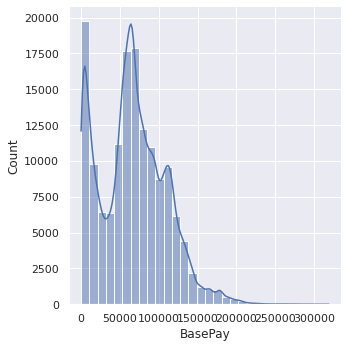

In [ ]:
# 2 What is the average BasePay?

# Type cast from Object to Float -> BasePay

clean_data['BasePay'] = clean_data['BasePay'].astype(float)  

sns.displot(clean_data['BasePay'], bins=30, kde=True)
plt.show()

Printing a graph of Base pay values allows the visualization of the frequency of it's values

**2 - What is the average BasePay?**

In [ ]:
# 2 Mean of BasePay

print(f"The mean for Base Pay is: \n${round(clean_data['BasePay'].mean(), 2)}")

The mean for Base Pay is: 
$66325.45


**3 - What is the highest amount of OvertimePay in the dataset ?**

In [ ]:
# 3 Highest amount of OvertimePay

# Type cast from Object to Float -> OvertimePay

clean_data['OvertimePay'] = clean_data['OvertimePay'].astype(float)

print(f"The Highest amout of Overtime Pay is: \n${clean_data['OvertimePay'].max()}")

The Highest amout of Overtime Pay is: 
$245131.88


**4 - What is the job title of MONICA FIELDS?**

In [ ]:
# 4 What is the job title of MONICA FIELDS?

data.set_index("EmployeeName", inplace = True)
print(f"The job title of Monica Fields is: \n{data.loc['MONICA FIELDS']['JobTitle']}")

The job title of Monica Fields is: 
DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)


**5 - What is the name of lowest paid person (including benefits)? This value seems correct?**

In [ ]:
# 5 What is the name of lowest paid person (including benefits)? This value seems correct?

clean_data.filter(items=['EmployeeName',
                         'BasePay',
                         'OvertimePay',
                         'Benefits',
                         'TotalPay',
                         'TotalPayBenefits']
                  ).sort_values('BasePay', ascending=True)[:1]

,EmployeeName,BasePay,OvertimePay,Benefits,TotalPay,TotalPayBenefits
72832,Irwin Sidharta,-166.01,249.02,6.56,83.01,89.57


This value does not seem right, since a person cannot be paid negatively, as the register shows. This must be a typo or entry error in the dataset, and should be cross checked with its source.

**6 - What was the average (mean) TotalPayBenefits of all employees in the year 2013?**

In [ ]:
# 6 What was the average (mean) TotalPayBenefits of all employees in the year 2013?

print(f"The average Total Payed Benefits of 2013 is:\n${round(clean_data.query('Year == 2013')['TotalPayBenefits'].mean(), 2)}")

The average Total Payed Benefits of 2013 is:
$101440.52


**7 - What are the top 5 most common jobs?**

In [ ]:
#  7 What are the top 5 most common jobs?

top5 = clean_data['JobTitle'].value_counts()[:5].index.tolist()
print('The top 5 most common jobs are:\n')
a = 1
for n in top5:
    print(f'{a} - {n}\n')
    a += 1

The top 5 most common jobs are:

1 - Transit Operator

2 - Special Nurse

3 - Registered Nurse

4 - Public Svc Aide-Public Works

5 - Police Officer 3



**8 - Is there a correlation between length of the EmployeeName string and Salary? Feel free to plot graphs!**

In [ ]:
# 8 Is there a correlation between length of the EmployeeName string and Salary? Feel free to plot graphs!

# Selecting data for correlation

data_cor = clean_data.filter(['EmployeeName', 'BasePay'])
data_cor[:3]
new_column = emp_len = list(data_cor['EmployeeName'].str.len())
data_cor['Emp_Name_Len'] = new_column
data_cor = data_cor.filter(['Emp_Name_Len', 'BasePay'])

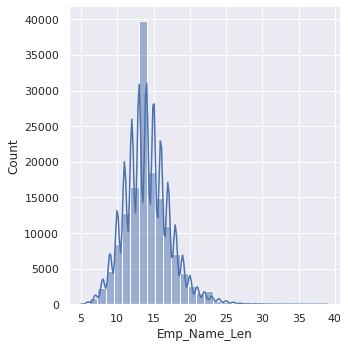

In [ ]:
# 8 Is there a correlation between length of the EmployeeName string and Salary? Feel free to plot graphs!

sns.displot(data_cor['Emp_Name_Len'], bins=30, kde=True)
plt.show()

Graph displaying how the length of the names are distributed

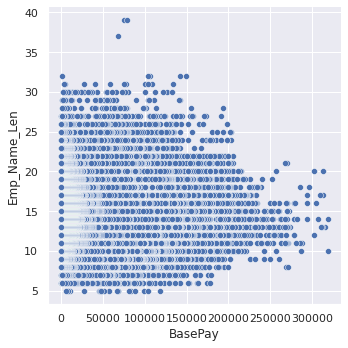

In [ ]:
# 8 Is there a correlation between length of the EmployeeName string and Salary? Feel free to plot graphs!

sns.relplot(x='BasePay', y='Emp_Name_Len', data=data_cor) 

Graph displaying the relation between Employee Names length and BasePay and how they are scattered inbetween the range of BasePay

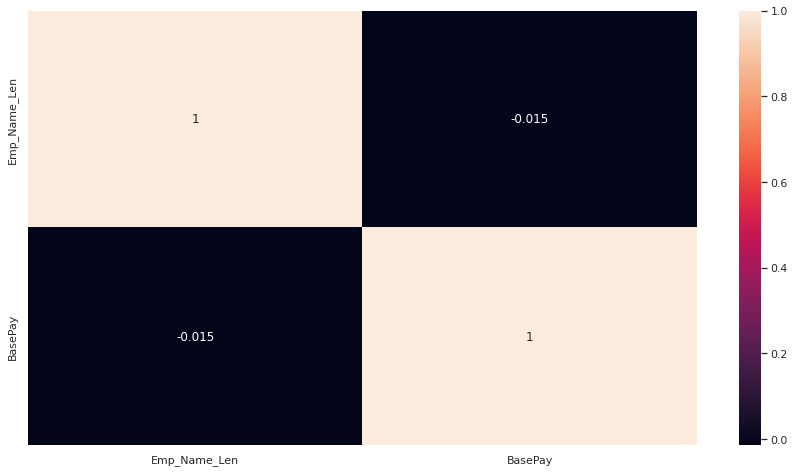

In [ ]:
# 8 Is there a correlation between length of the EmployeeName string and Salary? Feel free to plot graphs!

correlation=data_cor.corr()

sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(correlation,
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            annot=True
)

Heat map of the correlation between EmployeeName length and BasePay. And, as the map shows, these two columns are no correlated

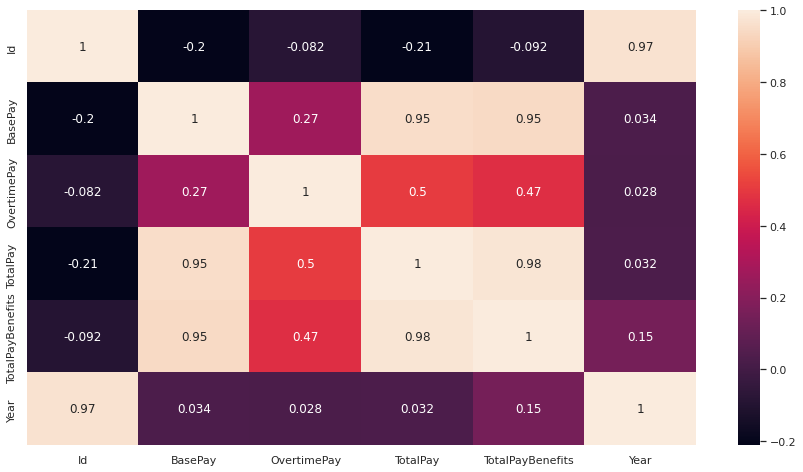

In [ ]:
correlation=clean_data.corr()

sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(correlation,
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            annot=True
)

Same heatmap as above, but using the clean dataset information, in order to have an overviews of the correlation between all the columns in the dataset.

**9 - Does the agency column bring any relevant information to this dataset? Why is that?**

As previously stated, the agency column consists of only one value which is 'San Francisco'. So we have, by the context, that the dataset is from the timeframe 2011~2014 of the San Francisco location. The dataset and the location information are both very relevant, but it would be better if there were information of other locations as well.


**10 - What could you predict using this dataset and how you would do it? Work out a plan and write about it (No need to implement!)**


We could start by asking some questions and see if the data could answer it.
Such as: 
 - Are the top common jobs the highest paying ones?
 - Is there a direct relation between the most common jobs and its BasePay?
 - The higher the BasePay, the higher the OvertimePay or OvertimeHours?

We could also think of a way to predict the benefits based on a given JobTitle (using statistical methods and Machine Learning).

**11 - If you could gather new information for this prediction, what would it be and why?***

Data relating to attendance to work, employee work hours, shift information, gender, age and location, as well as health related data if possible. 
With such information, we could analyse the pattern or age/job distribution as well as gender/job and gender/payment distribution. 
So we could develop different lines of investigation, such as:

Is the attendance of a employees with high overtime normal?

Is he/she having health related issues due to overtime work?

Do people tend to chose higher paying jobs?

What is the pattern people tend to take in chosing a job?

Are males or female employees being paid more?

We could analyse all of the above by location as well, and see if there are different patterns by region.

With all this information we could, for example:



* Think of public policies regarding a ceilling for maximum overtime hours for health safety
* Regulate the jobs/professions salaries based on its work hours
* Elaborate inclusion programs reffering to gender, age and health conditions
